In [23]:
import numpy as np

In [24]:
class Linear_Regression:

  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):

    self.m, self.n = X.shape

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self, ):

    Y_prediction = self.predict(self.X)

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - (2 * np.sum (self.Y - Y_prediction)) / self.m

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  def predict(self, X):

    return X.dot(self.w) + self.b

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [6]:
salary_data.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [9]:
salary_data.shape

(30, 2)

In [12]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [13]:
X = salary_data.iloc[:, :1].values
Y = salary_data.iloc[:, 1].values

In [15]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [16]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2)

In [45]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [46]:
model.fit(X_train, Y_train)

In [47]:
print('Weight = ', model.w[0])
print('Bias = ', model.b)

Weight =  9514.400999035135
Bias =  23697.406507136307


In [48]:
test_data_prediction = model.predict(X_test)

In [49]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


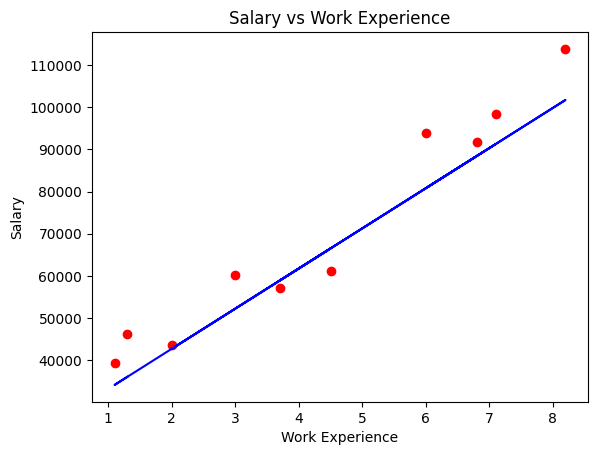

In [50]:
plt.scatter(X_test, Y_test, color = 'r')
plt.plot(X_test, test_data_prediction, color = 'b' )
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Work Experience')
plt.show()